# Data Science Challenge

In [242]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [243]:
#Libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

First let's load and print the structure of the data. In this case we could only look at the train data as it is almost the same structure than the test data (with one more column). But I prefer also to check and **prepare** the test data. So we will observe here the columns and the type of our cells first.

In [244]:
# Dataset is already loaded below
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") # I also load test data

In [245]:
# Have an idea of what the first rows look like.
train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


Note that we can already see some NaN values that we must handle before using maching learning techniques.

In [246]:
#Explore columns
print(train.columns)
train.dtypes # Display type of each columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')


id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

In [247]:
test.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [248]:
#Explore test columns
print(test.columns)
test.dtypes

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels'],
      dtype='object')


id                      int64
region                 object
latitude              float64
longitude             float64
accommodation_type     object
cost                    int64
minimum_nights          int64
number_of_reviews       int64
reviews_per_month     float64
owner_id                int64
owned_hotels            int64
dtype: object

In [249]:
#Description
train.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [250]:
#Description
test.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,545.000000,7.180000e+02,718.000000
mean,27909.484680,40.729173,-73.952992,183.538997,12.022284,14.735376,1.200385,7.838886e+07,8.604457
std,14173.417592,0.055754,0.047447,385.569803,55.969827,26.880378,1.429961,8.461906e+07,27.787289
min,36.000000,40.499790,-74.240840,10.000000,1.000000,0.000000,0.010000,7.355000e+03,1.000000
25%,16847.500000,40.689045,-73.982415,70.000000,1.000000,1.000000,0.290000,8.198337e+06,1.000000
50%,30372.000000,40.725595,-73.957475,110.500000,3.000000,4.000000,0.670000,3.727272e+07,1.000000
75%,39853.250000,40.763933,-73.938165,189.000000,6.000000,16.000000,1.530000,1.420999e+08,3.000000
max,48887.000000,40.893230,-73.732920,7500.000000,1250.000000,241.000000,8.940000,2.735464e+08,327.000000


Let's check NaN values.

In [251]:
train.isna().sum(axis=0)

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [252]:
test.isna().sum(axis=0)

id                      0
region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owner_id                0
owned_hotels            0
dtype: int64

We can clearly see that there is NaN values on the reviews per month. As we have seen this column takes floats values so we will replace these nan values by 0. I think this feature can have an effect on the prediction because if there is more people, there is a good chance to have more reviews so it can have an effect on the availability.

In [253]:
train["reviews_per_month"] = train["reviews_per_month"].fillna(0) # Fills nan values
test["reviews_per_month"] = test["reviews_per_month"].fillna(0)

In [254]:
# Let's check
print(train.isna().sum(axis=0)["reviews_per_month"]) #Count the number of NaN values on the specified columns
print(test.isna().sum(axis=0)["reviews_per_month"])

0
0



Let's discuss about the link between each feature and the yearly availability before further analysis:

**Region**: Can have an impact on how much people comes at the hotel so it have an impact on the yearly_availability.

**Latitude-Longitue**: These features doesn't really make sense alone but together they give us information about where the hotel is which can have the same impact than the region feature. 

**Accommodation_type**: Of course the service proposed by the hotel have an influence on the number of people wanting to reserve a room.

**Cost**: Theorically for two same hotel the most expensive will have less clients so it have a repercussion.

**Minimum_nights**: The hotel can be less attractive if the minimum nights is too big.

**Number_of_reviews**: Can influence client in a good or bad way on the hotel.

**Reviews_per_month**: Same reasoning than number of reviews but gives a more precise evaluation of the hotel (in time) .

**Owner_id**: For me there isn't any correlation with the yearly availability.

**Owned_hotels**: Of course there is not a direct relation with yearly availability but we can assume that an owner who have more hotels have a better experience in managing them and he is more likely to make his/her hotel successful.



If we want to apply machine learning techniques it is necessary to have numerical values in each columns. So, we need to handle the accomodation_type and the region. The classical way is to apply a one hot encoding of the differents unique values.

Furthermore, we want to drop columns which have no effect on the prediction. Obviously, the id and the owner_id have no correlation with the feature we want to predict. (At least in my opinion)

In [255]:
# Let's do the one hot encoding

train = pd.get_dummies(train)
test = pd.get_dummies(test)

# And drop the "useless" features
train = train.drop(["id","owner_id"],axis = 1)
test = test.drop(["id","owner_id"],axis = 1)

In [256]:
# Let's check again our two datasets

train.head()
train

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,40.71854,-74.00439,170,5,7,0.56,1,0,0,0,1,0,0,1,0,0
1,40.64446,-73.95030,65,3,238,2.30,1,0,0,1,0,0,0,1,0,0
2,40.78573,-73.81062,85,1,0,0.00,1,1,0,0,0,1,0,0,1,0
3,40.73863,-73.98002,210,30,0,0.00,65,1,0,0,1,0,0,0,1,0
4,40.82426,-73.94630,75,3,38,0.42,3,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,40.74316,-73.98038,400,2,0,0.00,1,1,0,0,1,0,0,0,1,0
2866,40.73523,-73.99465,180,3,2,0.07,1,1,0,0,1,0,0,0,1,0
2867,40.76619,-73.98987,179,3,17,0.67,1,0,0,0,1,0,0,1,0,0
2868,40.74637,-73.97207,200,30,0,0.00,49,1,0,0,1,0,0,0,1,0


In [257]:
test.head()
test

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,40.70912,-73.94513,135,2,22,0.66,1,0,1,0,0,0,0,0,1
1,40.57646,-73.96641,69,2,8,0.90,2,0,1,0,0,0,1,0,0
2,40.76616,-73.98228,225,30,0,0.00,12,0,0,1,0,0,0,1,0
3,40.77668,-73.94587,125,30,9,0.82,1,0,0,1,0,0,0,0,1
4,40.80279,-73.94450,43,1,13,0.72,2,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,40.84590,-73.91558,77,2,36,1.81,1,1,0,0,0,0,1,0,0
714,40.71026,-73.94744,145,3,43,1.36,1,0,1,0,0,0,1,0,0
715,40.71390,-73.99120,90,2,60,4.35,1,0,0,1,0,0,1,0,0
716,40.74399,-73.97204,200,30,0,0.00,23,0,0,1,0,0,0,1,0


We are now ready to apply machine learning techniques.

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

As I have already prepared the test dataset, I will first check the correlation matrix to have a better numerical understanding of the relation between the features. Specially the relation with the yearly_availability.

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
correlations = train.corr()
correlations

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
latitude,1.000000,0.049337,0.009657,0.010614,0.006295,0.015358,0.064103,-0.025119,0.352369,-0.678672,0.575303,-0.013750,-0.159718,0.004284,0.000188,-0.005122
longitude,0.049337,1.000000,-0.136140,-0.074862,0.006381,0.052653,-0.142529,0.119882,0.233485,-0.004712,-0.474424,0.651172,-0.248123,-0.062670,0.048603,0.013993
cost,0.009657,-0.136140,1.000000,0.052918,-0.074432,-0.123086,0.032185,0.147576,-0.046705,-0.084543,0.141398,-0.066359,0.003322,-0.113357,0.126273,-0.020195
minimum_nights,0.010614,-0.074862,0.052918,1.000000,-0.088767,-0.139803,0.107893,0.173550,-0.025758,-0.045813,0.071547,-0.026489,-0.006379,-0.129518,0.166778,-0.049767
number_of_reviews,0.006295,0.006381,-0.074432,-0.088767,1.000000,0.576553,-0.112328,-0.191645,0.005239,0.053843,-0.032103,-0.026691,-0.028090,0.255994,-0.177441,-0.082181
reviews_per_month,0.015358,0.052653,-0.123086,-0.139803,0.576553,1.000000,-0.147011,-0.312213,0.022862,0.021694,-0.042358,0.022218,-0.007715,0.321488,-0.300600,-0.010960
owned_hotels,0.064103,-0.142529,0.032185,0.107893,-0.112328,-0.147011,1.000000,0.191906,-0.035747,-0.156839,0.209776,-0.064695,-0.017487,-0.101230,0.138570,-0.048646
yearly_availability,-0.025119,0.119882,0.147576,0.173550,-0.191645,-0.312213,0.191906,1.000000,0.077609,-0.079190,-0.019062,0.094650,0.050205,-0.645568,0.690654,-0.081234
region_Bronx,0.352369,0.233485,-0.046705,-0.025758,0.005239,0.022862,-0.035747,0.077609,1.000000,-0.129349,-0.155657,-0.064301,-0.011702,-0.032510,0.059385,-0.033279
region_Brooklyn,-0.678672,-0.004712,-0.084543,-0.045813,0.053843,0.021694,-0.156839,-0.079190,-0.129349,1.000000,-0.720693,-0.297716,-0.054182,0.070504,-0.092917,0.029619


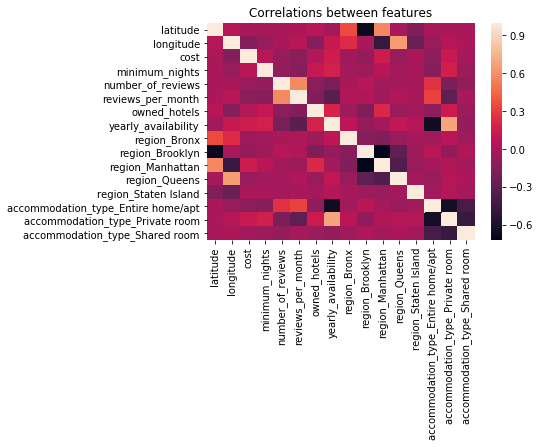

In [260]:
ax = plt.axes()
sns.heatmap(correlations,ax = ax)
ax.set_title("Correlations between features")
plt.show()

Here we can have a better understanding of the correlation matrix. Obviously, we have one on the diagonal because we have the correlation between two same features. Already here, we can see that the accomodation_type_Private room has a great correlation with the yearly_availability. Let's have a better view on the yearly_availability and his relation with others features.



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [261]:
corr_copy = correlations
corr_copy["feature"] = corr_copy.index

In [262]:
print(correlations["yearly_availability"].sort_values(ascending=False)[1:]) 

accommodation_type_Private room       0.690654
owned_hotels                          0.191906
minimum_nights                        0.173550
cost                                  0.147576
longitude                             0.119882
region_Queens                         0.094650
region_Bronx                          0.077609
region_Staten Island                  0.050205
region_Manhattan                     -0.019062
latitude                             -0.025119
region_Brooklyn                      -0.079190
accommodation_type_Shared room       -0.081234
number_of_reviews                    -0.191645
reviews_per_month                    -0.312213
accommodation_type_Entire home/apt   -0.645568
Name: yearly_availability, dtype: float64


We can already see which features have more impact on the yearly_availability.

As we have less than 20 features let's visualize them all.

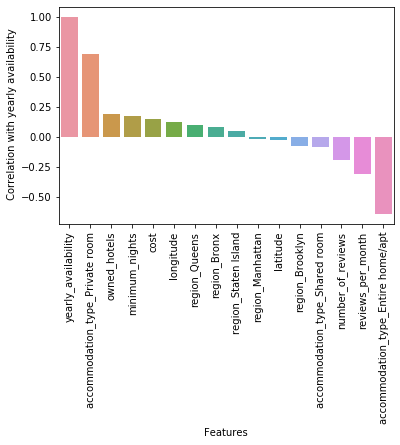

In [263]:
sns.barplot(x = "feature",y = "yearly_availability",data = corr_copy, order =  corr_copy.sort_values("yearly_availability", ascending = False).feature)
plt.xlabel("Features")
plt.ylabel(" Correlation with yearly availability")
plt.xticks(rotation = 90)
plt.show()

We can see that there is a very high positive correlation between the accomodation_type_Private room which means that there is a good chance that if this feature is big (one) the yearly availability will be one. In contrary, the accomadation_type_Entire home\apt have a great negative correlation so it is interresting to keep theses features.

Furthermore, we can see that we have almost no correlation with region_Manhattan and latitude. So maybe it can be interresting to remove them to do our predictions. However, removing latitude without removing longitute doesn't really make sense (Human sense).



# The model

As we have a binary classification problem we can use the classical logistic regression to predict our values.

In [264]:
from sklearn.linear_model import LogisticRegression

In [265]:
# Let's remove the prediction columns of the train
x_train = train.drop(columns = "yearly_availability")
x_train

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,40.71854,-74.00439,170,5,7,0.56,1,0,0,1,0,0,1,0,0
1,40.64446,-73.95030,65,3,238,2.30,1,0,1,0,0,0,1,0,0
2,40.78573,-73.81062,85,1,0,0.00,1,0,0,0,1,0,0,1,0
3,40.73863,-73.98002,210,30,0,0.00,65,0,0,1,0,0,0,1,0
4,40.82426,-73.94630,75,3,38,0.42,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,40.74316,-73.98038,400,2,0,0.00,1,0,0,1,0,0,0,1,0
2866,40.73523,-73.99465,180,3,2,0.07,1,0,0,1,0,0,0,1,0
2867,40.76619,-73.98987,179,3,17,0.67,1,0,0,1,0,0,1,0,0
2868,40.74637,-73.97207,200,30,0,0.00,49,0,0,1,0,0,0,1,0


In [266]:
# And put it in our y dataset
y_train = train["yearly_availability"]
y_train

0       0
1       0
2       1
3       1
4       1
       ..
2865    1
2866    1
2867    0
2868    1
2869    1
Name: yearly_availability, Length: 2870, dtype: int64

In [267]:
# Let's define our model
model = LogisticRegression(random_state = 0,solver='lbfgs',max_iter = 1000).fit(x_train,y_train)

In [268]:
array = model.predict_proba(x_train)
print(array)

[[0.96581573 0.03418427]
 [0.92077    0.07923   ]
 [0.06915092 0.93084908]
 ...
 [0.96542555 0.03457445]
 [0.04480705 0.95519295]
 [0.1675234  0.8324766 ]]


As we can see we must process the result before computing the accuracy.

In [269]:
# Let's define some function to convert our array to prediction and compute our accuracy

# We will just take the best index for each row.
def array_to_prediction(arr):
    return np.asarray([0 if row[0] >= row[1] else 1 for row in arr])

def compute_acc(y,y_pred):
    y = y.to_numpy() # because y will have a pandas structure
    return np.sum(y == y_pred)/len(y) # Our Number of correct predictions over our total number of prediction

In [270]:
y_pred = array_to_prediction(array)
y = y_train
print(" Training Accuracy:", compute_acc(y,y_pred))

 Training Accuracy: 0.8609756097560975


We can also train the model with a sub part of the training data just to see a test accuracy.

In [271]:
# let's see the total size
print(len(x_train))

2870


In [272]:
sub_size = 2000 # let's take the 2000 first sample as training sub part
model2 = LogisticRegression(random_state = 0,solver='lbfgs',max_iter = 1000).fit(x_train[0:sub_size],y_train[0:sub_size])

In [273]:
array2 = model.predict_proba(x_train[sub_size:]) # So we predict on the values we didn't train
y2 = y_train[sub_size:]
y_pred2 = array_to_prediction(array2)

In [274]:
print("Test Accuracy: ", compute_acc(y2,y_pred2))

Test Accuracy:  0.8689655172413793


We have a slightly better test accuracy which is very good.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

Now, let's predict our test dataset.

In [275]:
x_test = test # In case we want to re-run without losing the dataset test
model = LogisticRegression(random_state = 0,solver='lbfgs',max_iter = 1000).fit(x_train,y_train)
array3 = model.predict_proba(x_test)
y_pred3 = array_to_prediction(array3)

In [276]:
test = pd.read_csv("test.csv") # We want to take the id's from the original test dataset

In [277]:
# we create two differents data frame, by concatenating them we obtain our submission dataframe
ids = test["id"].to_numpy()
ids = pd.DataFrame(data = ids, columns = ["id"])
yearly_availability = pd.DataFrame(data = y_pred3, columns = ["yearly_availability"]) 

In [278]:
submission_df = pd.concat([ids,yearly_availability],axis = 1) # concatenate on axis = 1 (column)
submission_df

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0
...,...,...
713,26801,0
714,20110,0
715,31383,0
716,47135,1


In [279]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---